<a href="https://colab.research.google.com/github/ramsurya98/Introduction-Network-Science-2021/blob/main/Exercise09_Bonus/E09_Bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(0)

def CG(A, b, x_init, tol=1e-8):
    x0 = x_init.copy()
    r = np.dot(A, x0) - b
    p = -r
    r_norm = np.linalg.norm(r)   
    x = [x0]
    while r_norm > tol:
        p0 = np.dot(A, p)
        rsq = np.dot(r, r)        
        alpha = rsq / np.dot(p, p0)
        x0 = x0 + alpha * p
        r = r + alpha * p0
        beta = np.dot(r, r) / rsq
        p = -r + beta * p
        x.append(x0)
        r_norm = np.linalg.norm(r)        
    return np.array(x)


In [2]:
from sklearn.datasets import make_spd_matrix

time_list = []
mat_size = [2*i for i in range(1,257)]
iter = 0
n = 0
for i in mat_size:
  iter += 0
  A = make_spd_matrix(i, random_state=0)
  x_star = np.random.random(i)
  b = np.dot(A, x_star)
  x0 = np.random.random(i)
  start = time.perf_counter()
  xs = CG(A, b, x0)
  time_list.append(time.perf_counter() - start)
  tval = np.allclose(xs[-1], x_star, rtol=1e-02, atol=1e-02)
  if tval == False:
    print("Something fishy is going on for n = ", i)
  n += tval


Text(0, 0.5, 'Time(sec)')

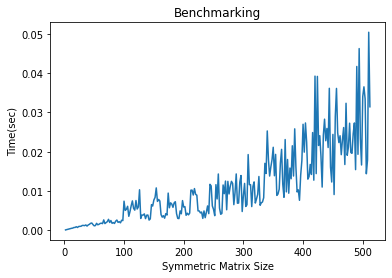

In [3]:
plt.plot(mat_size,time_list)
plt.title("Benchmarking")
plt.xlabel("Symmetric Matrix Size")
plt.ylabel("Time(sec)")